In [195]:
import time
import numpy as np
import matplotlib.pyplot as plt
import utils_img_rec as ut

import pathlib

import cv2
from cv2 import Canny

import pickle
inicio = time.time()

from PIL import Image

def expand2square(rgb_img, background_color=(0, 0, 0)):
    '''fill the with the background_color (grayscale take the mean) to have height = width'''
    pil_img = Image.fromarray(rgb_img)

    if pil_img.mode == 'L':
        background_color = int(
            (background_color[0] + background_color[1] + background_color[2])/3)

    elif pil_img.mode == 'RGB':
        pass

    else:
        raise Exception("No Grayscale or RGB identified")

    width, height = pil_img.size

    if width == height:
        return rgb_img

    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return np.asarray(result)

    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return np.asarray(result)

In [196]:
#DATADIR = r"..\..\..\_DATA_\image\face\faustao\faustao.jpg"
DATADIR = "erick40.jpg"

#DATADIR = r"..\..\..\_DATA_\image\faces-personal\erick-antigo (6).jpg"

path = pathlib.Path(DATADIR)
print(path)

erick40.jpg


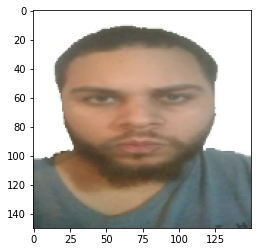

In [197]:
img = cv2.imread(str(path) ,cv2.cv2.IMREAD_COLOR)
img = cv2.resize(img, (150, 150))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb = expand2square(img_rgb)

plt.imshow(img_rgb, cmap='gray')
plt.show()

In [198]:
from scipy.ndimage import gaussian_filter

def gaussian(img, sig=1.0, fill='nearest' ):#***************************************************8
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = gaussian_filter(img, sigma=sig, order=0, cval=0.0, truncate=4.0, mode=fill)

    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def blur_p(img):
    img = cv2.medianBlur(img,  9)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb, cmap='gray')
    plt.show() 

def sobel_p(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

    sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0) 
    sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1) 
    sobelX = np.uint8(np.absolute(sobelX)) 
    sobelY = np.uint8(np.absolute(sobelY)) 
    sobel = cv2.bitwise_or(sobelX, sobelY) 

    return sobel

def equal_hist_p(img):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img = cv2.equalizeHist(img)

    plt.imshow(img, cmap='gray')
    plt.show() 

def gaussian_blur(img):
    
    img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

    return img

def normalize(img):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    img = cv2.normalize(img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img = np.uint8(img)
    return img

def canny_p(img):
    
    can = cv2.Canny(img, 80, 200)

    img_rgb = cv2.cvtColor(can, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb, cmap='gray')
    plt.show()
    return can

from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

def otsu_canny(img):

    grays = rgb2gray(img)
    thresh = threshold_otsu( grays )    
    binary = grays > thresh

    binary = np.uint8(binary)*255
   
    search_canny(img, range(0,200,50), range(0,200,50))

def otsu_canny2(img):

    grays = rgb2gray(img)
    thresh = threshold_otsu( grays )    
    binary = grays > thresh

    binary = np.uint8(binary)*255
   
    can = cv2.Canny(binary, 50, 150)
            
    plt.imshow(can, cmap='gray')
    plt.show()

def top_hat(img):
    for i in range(30):
        filterSize = (i+1, i+1)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
    
        # Reading the image named 'input.jpg'
        input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Applying the Black-Hat operation
        tophat_img = cv2.morphologyEx(input_image, cv2.MORPH_BLACKHAT, kernel)
        plt.imshow(tophat_img, cmap='gray')
        plt.show()


In [199]:
def search_canny(img, list1, list2):
    for i in list1:
        for j in list2:
            
            print('i: ', i, 'j: ', j)
            can = cv2.Canny(img, i, j)

            plt.imshow(can, cmap='gray')
            plt.show()


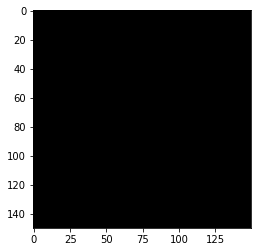

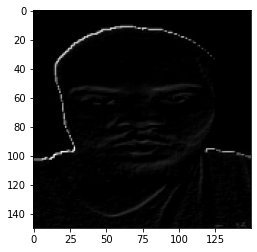

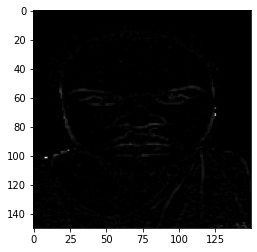

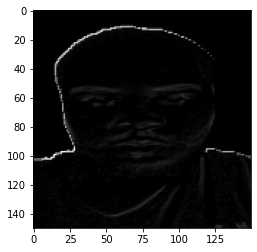

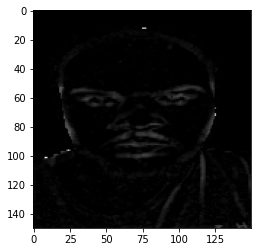

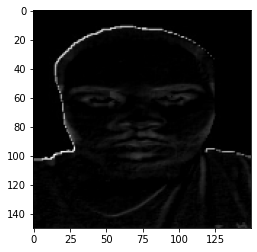

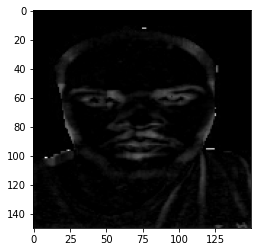

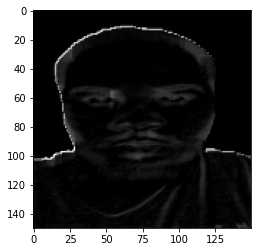

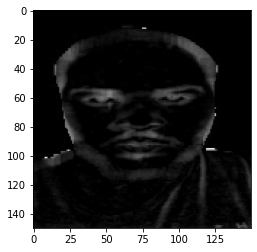

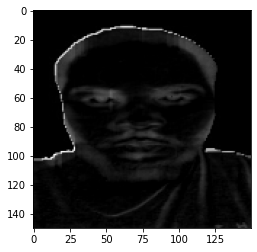

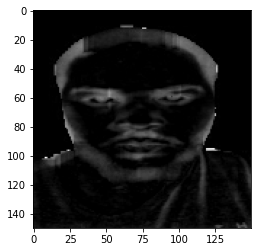

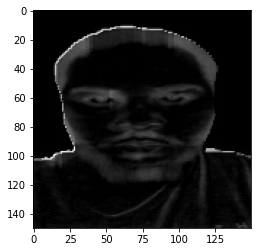

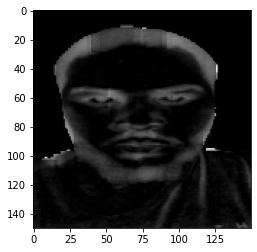

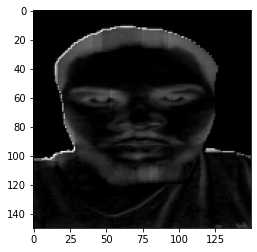

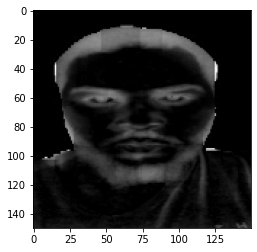

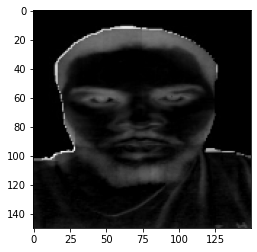

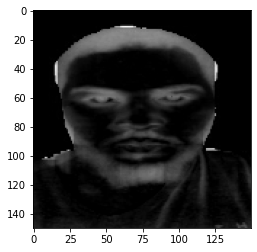

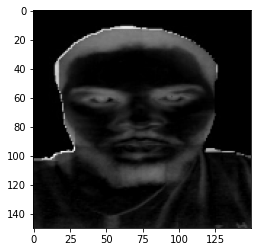

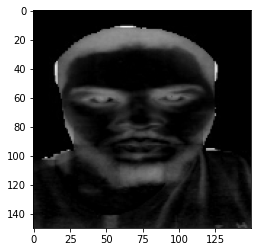

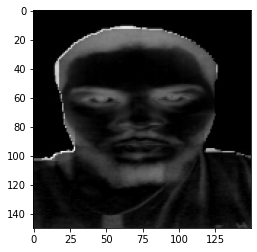

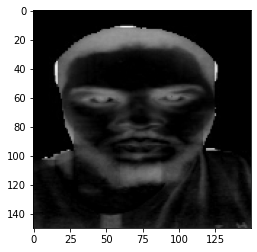

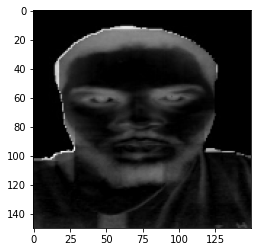

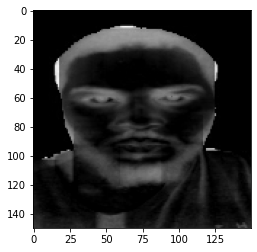

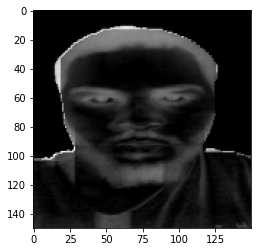

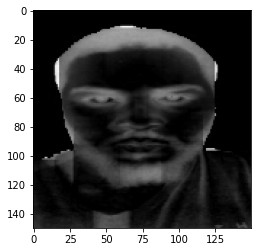

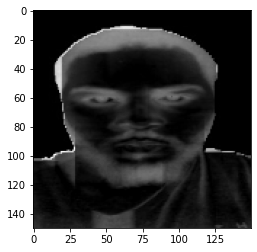

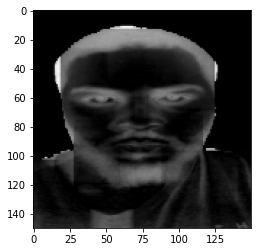

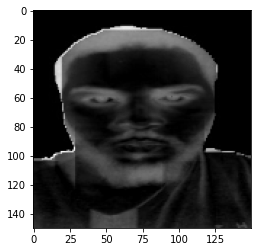

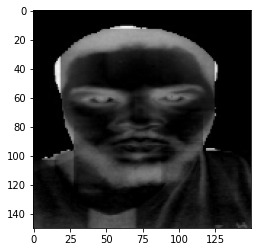

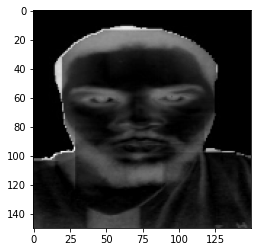

In [200]:
top_hat(img)

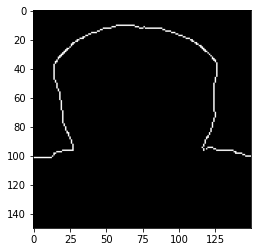

In [201]:
otsu_canny2(img)

i:  0 j:  0


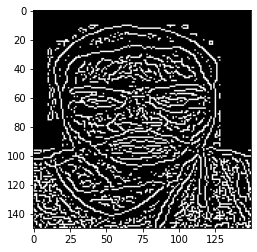

i:  0 j:  50


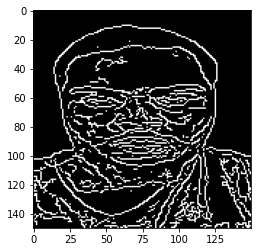

i:  0 j:  100


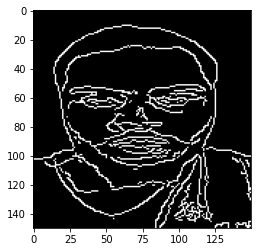

i:  0 j:  150


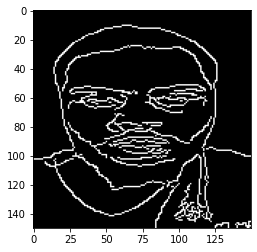

i:  50 j:  0


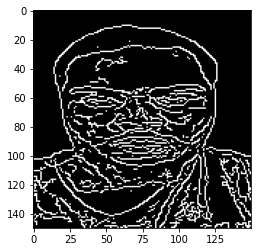

i:  50 j:  50


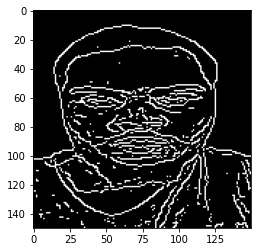

i:  50 j:  100


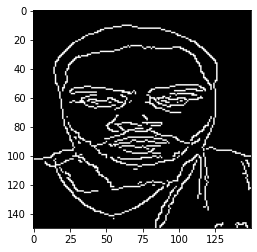

i:  50 j:  150


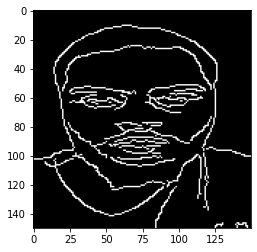

i:  100 j:  0


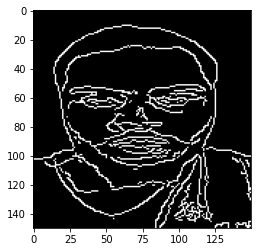

i:  100 j:  50


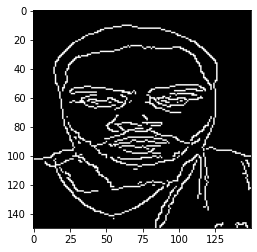

i:  100 j:  100


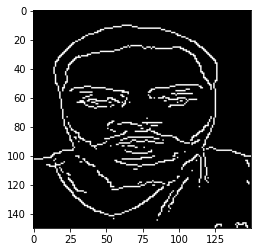

i:  100 j:  150


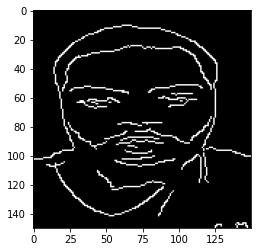

i:  150 j:  0


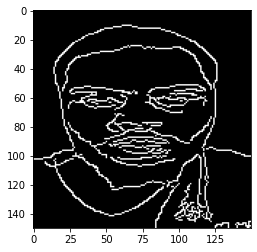

i:  150 j:  50


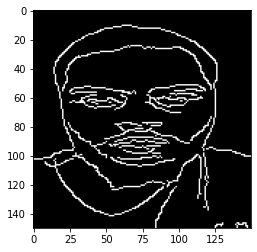

i:  150 j:  100


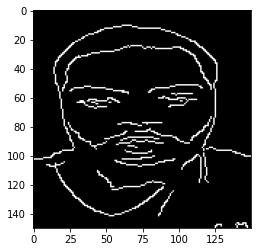

i:  150 j:  150


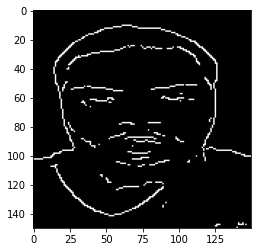

In [202]:
otsu_canny(img)

In [203]:
#plt.imshow( cv2.cvtColor(                 sobel_canny(      img          ), cv2.COLOR_BGR2RGB) , cmap='gray')
#plt.show()
#plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB) , cmap='gray')
#plt.show() 